In [44]:
!ls

CreatePrecinctNeighbor.ipynb RI_enlarged_precinct.json
RI_Precinct.json             RI_neighbor.json
RI_Precinct_Cleaned.json     cleanPrecinct.ipynb
RI_Precinct_Shape_Files


## 21. Identify precinct neighbors (required) (sequence diagram not required)
Identify two precincts as neighbors if they share a common boundary of at least 200 feet.

In [45]:
import geopandas as gpd

In [46]:
gdf = gpd.read_file("../../RI_Precinct_Merged.json")
gdf.head()

,Precinct #,County,Precinct Name,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes,geometry
0,0101,Bristol County,Barrington 0101,1027,522,60,23,2,1634,"POLYGON ((-71.32270 41.77270, -71.32270 41.772..."
1,0102,Bristol County,Barrington 0102,1331,683,68,21,3,2106,"MULTIPOLYGON (((-71.35581 41.74533, -71.35560 ..."
2,0103,Bristol County,Barrington 0103,1136,469,59,17,0,1681,"POLYGON ((-71.31979 41.73751, -71.31897 41.737..."
3,0104,Bristol County,Barrington 0104,1328,611,78,25,2,2044,"MULTIPOLYGON (((-71.30677 41.74204, -71.30682 ..."
4,0105,Bristol County,Barrington 0105,1290,590,69,24,4,1977,"MULTIPOLYGON (((-71.31354 41.72381, -71.31370 ..."


# convert to coordinate system that uses meter

In [47]:
gdf = gdf.to_crs("EPSG:3857")

# find neighbor in <= 200feets
- note that 200 meters = 60.96 feet

In [48]:
'''
object.buffer(distance, resolution=16, cap_style=1, join_style=1, mitre_limit=5.0)¶
'''
gdf["enlarged_geometry"] = None
for index, row in gdf.iterrows():
    cur = row["geometry"]
    gdf.at[index, "enlarged_geometry"] = cur.buffer(30.48)

In [49]:
gdf.set_geometry("enlarged_geometry", inplace=True)

In [50]:
gdf.head(1)

,Precinct #,County,Precinct Name,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes,geometry,enlarged_geometry
0,0101,Bristol County,Barrington 0101,1027,522,60,23,2,1634,"POLYGON ((-7939606.144 5126991.785, -7939606.1...","POLYGON ((-7942007.142 5124456.840, -7942062.4..."


# find neighbors

In [51]:
gdf["Neighbors"] = ""
for index, row in gdf.iterrows():   
    neighbors = gdf[gdf["enlarged_geometry"].intersects(row["enlarged_geometry"])]["Precinct #"].tolist()
    neighbors.remove(row["Precinct #"])
    gdf.at[index, "Neighbors"] = ", ".join(neighbors)

In [52]:
gdf.set_geometry("geometry", inplace=True, drop=True)

In [53]:
gdf = gdf.to_crs("EPSG:4326")

In [54]:
# gdf.to_file("RI_neighbor.json", driver="GeoJSON")

In [55]:
gdf.head(1)

,Precinct #,County,Precinct Name,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes,enlarged_geometry,Neighbors
0,0101,Bristol County,Barrington 0101,1027,522,60,23,2,1634,"POLYGON ((-71.32270 41.77270, -71.32270 41.772...","0102, 0104, 1013, 1016, 1017"


In [56]:
gdf = gdf.to_crs("EPSG:3857")

In [57]:
regular_shape = gdf.loc[0]["enlarged_geometry"]

In [58]:
enlarged_shape = regular_shape.buffer(30.48)

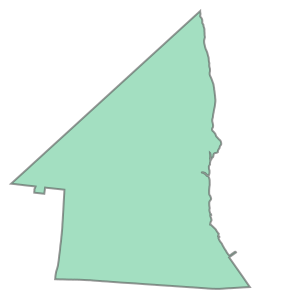

In [59]:
regular_shape

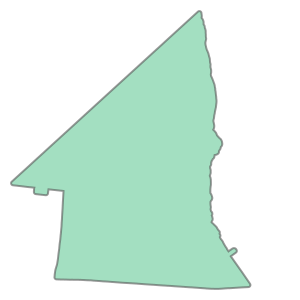

In [60]:
enlarged_shape